# Телеком — задача проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

### Данные

[final_provider.zip](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/ac39c23b-718e-4cd6-bdaa-85b3a127a457/final_provider.zip)

Данные также находятся в тренажёре, в папке `/datasets/final_provider/`.

-                              ПЛАН ВЫПОЛНЕНИЯ ПРОЕКТА "Прогноз оттока клиентов оператора связи"
                              
1. Исследование данных

  1.1. Анализ представленных датасетов.
  1.2. Поиск пропусков,аномалий,обзор статистики и проверка типов данных и т.д.
  1.3. Выводы.
  
2. Подготовка,предобработка данных 

  2.1. Объединение таблиц.
  2.2. Обнаружение пропусков, дубликатов и при наличии их обработка.
  2.3. Если есть необходимость,то изменение типов данных.
  2.4. Создание дополнительных признаков,например времени действия контракта.
  2.5. Анализ итогового датасета на предмет коллениарности признаков.
  2.6. Визуализация корреляций признаков и целевого признака методами библиотеки SKLEARN.
  2.7. Создание features и target,разделение на train и test выборки и их кодирование.
  2.8. Выводы.
  
3. Создание и испытание моделей.

  3.1. Подбор гиперпараметров моделей LogisticRegression, CatBoostClassifier.
  3.2. Определение метрик на train выборке с помощью cros_val_score.
  3.3. Проведение анализа по выбору лучшей модели возможностями библиотеки SKLEARN.
  3.4. Выводы.
  
4. Испытание лучшей модели на тестовой выборке.

  4.1. Определение значений всех основных метрик задачи классификации и ROC_AUC.
  4.2. Построение и анализ значений по матрице неточностей.
  4.3. Определение важных признаков лучшей модели.
  4.4. Визуализация полученных результатов возможностями библиотеки SKLEARN.
  4.5. Выводы.
  
5. ВЫВОД ПО ПРОЕКТУ.  
-

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.utils.class_weight import compute_class_weight

!pip install scikit-plot
import scikitplot as skplt

!pip install catboost
import catboost as cb
import catboost
from catboost import Pool,CatBoost
from catboost import CatBoostClassifier
from catboost.utils import eval_metric
from catboost.utils import get_fpr_curve
from catboost.utils import get_fnr_curve
from catboost.utils import select_threshold
from catboost.utils import get_roc_curve
from catboost.utils import get_confusion_matrix
from catboost import MetricVisualizer
from sklearn.utils.class_weight import compute_class_weight
from catboost import cv

!pip install sweetviz
import sweetviz
print("SweetViz Version : {}".format(sweetviz.__version__))

     |████████████████████████████████| 15.1 MB 2.6 MB/s eta 0:00:01
SweetViz Version : 2.1.4


In [2]:
try:
    data_contract=pd.read_csv('C:/Users/анатолий/Documents/datasets/final_provider/final_provider/contract.csv')
    data_personal=pd.read_csv('C:/Users/анатолий/Documents/datasets/final_provider/final_provider/personal.csv')
    data_internet=pd.read_csv('C:/Users/анатолий/Documents/datasets/final_provider/final_provider/internet.csv')
    data_phone=pd.read_csv('C:/Users/анатолий/Documents/datasets/final_provider/final_provider/phone.csv')
    
except:
    data_contract=pd.read_csv('/datasets/final_provider/contract.csv')
    data_personal=pd.read_csv('/datasets/final_provider/personal.csv')
    data_internet=pd.read_csv('/datasets/final_provider/internet.csv')
    data_phone=pd.read_csv('/datasets/final_provider/phone.csv')

In [3]:
data_contract.shape,data_personal.shape,data_internet.shape,data_phone.shape

((7043, 8), (7043, 5), (5517, 8), (6361, 2))

In [4]:
data_contract = data_contract.set_index('customerID')
data_contract

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...
6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45


In [5]:
data_contract.info()
print(data_contract.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(6)
memory usage: 440.2+ KB
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


In [6]:
data_contract['Type'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

In [7]:
data_contract['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

В таблице CONTRACT пропуски не обнаружены,но тип данных в столбце TotalCharges это object, почему это так надо посмотреть.

In [8]:
data_contract.loc[data_contract['TotalCharges']==' ']# посмотрим отсутствие данных

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,


In [9]:
data_contract = data_contract.loc[data_contract['TotalCharges'] !=' ']

In [10]:
data_contract['TotalCharges'] = data_contract['TotalCharges'].astype('float')

In [11]:
data_contract.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7032 non-null   object 
 1   EndDate           7032 non-null   object 
 2   Type              7032 non-null   object 
 3   PaperlessBilling  7032 non-null   object 
 4   PaymentMethod     7032 non-null   object 
 5   MonthlyCharges    7032 non-null   float64
 6   TotalCharges      7032 non-null   float64
dtypes: float64(2), object(5)
memory usage: 439.5+ KB


-ИТАК:

Проанализировав таблицу с контрактами определили следующее:

1. Обнаружено 11 абонентов с датой заключения контракта на момент завершения сбора данных - благополучно были удалены.
2. Тип данных соответствует логике содержащихся в таблице данных.
3. Пропуски,аномалии отсутствуют.
4. Тип данных object в других столбцах будет изменен (кодирован) при подготовке признаков для исследования моделей.
5. Столбец с информацией о закрытии контракта EndDate определим как целевой признак (target) а именно
   будем считать,что продолжение контракта ( значение "NO" ) есть метка отрицательного класса ("0"),
   а закрытие контракта (любая другая информация) есть метка положительного класса ("1").
-   

In [12]:
data_personal = data_personal.set_index('customerID')
data_personal

,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
7590-VHVEG,Female,0,Yes,No
5575-GNVDE,Male,0,No,No
3668-QPYBK,Male,0,No,No
7795-CFOCW,Male,0,No,No
9237-HQITU,Female,0,No,No
...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes
2234-XADUH,Female,0,Yes,Yes
4801-JZAZL,Female,0,Yes,Yes


In [13]:
data_personal.info()
print(data_personal.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null   object
dtypes: int64(1), object(3)
memory usage: 275.1+ KB
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64


В данной таблице не видим пропусков, а тип данных логичен и для пола,и статуса пенсионера,и семейного положения и наличия иждивенцов в семье.

In [14]:
data_internet = data_internet.set_index('customerID')
data_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
7590-VHVEG,DSL,No,Yes,No,No,No,No
5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...
6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
4801-JZAZL,DSL,Yes,No,No,No,No,No


In [15]:
data_internet.info()
print(data_internet.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   5517 non-null   object
 1   OnlineSecurity    5517 non-null   object
 2   OnlineBackup      5517 non-null   object
 3   DeviceProtection  5517 non-null   object
 4   TechSupport       5517 non-null   object
 5   StreamingTV       5517 non-null   object
 6   StreamingMovies   5517 non-null   object
dtypes: object(7)
memory usage: 344.8+ KB
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64


In [16]:
data_internet['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64

В данных об интернет-сервисах также нет пропусков и тип данных позволит провести нужную кодировку при создании признаков.

In [17]:
data_phone = data_phone.set_index('customerID')
data_phone

,MultipleLines
customerID,
5575-GNVDE,No
3668-QPYBK,No
9237-HQITU,No
9305-CDSKC,Yes
1452-KIOVK,Yes
...,...
2569-WGERO,No
6840-RESVB,Yes
2234-XADUH,Yes


In [18]:
data_phone.info()
print(data_phone.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 6361 entries, 5575-GNVDE to 3186-AJIEK
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MultipleLines  6361 non-null   object
dtypes: object(1)
memory usage: 99.4+ KB
MultipleLines    0
dtype: int64


In [19]:
data_phone.value_counts()

MultipleLines
No               3390
Yes              2971
dtype: int64

Такие же выводы делаем из анализа таблицы с услугами телефонии

                                     ПОДГОТОВКА,ПРЕДОБРАБОТКА ДАННЫХ.

In [20]:
data = data_contract.join([data_personal,data_internet,data_phone]).reset_index()
data = data.fillna('No')# заполнили образовавшиеся пропуски
data

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.50,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
7028,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.90,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
7029,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,No
7030,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.60,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


Сгенерируем признак связанный с длительностью контракта

In [21]:
data.loc[data['EndDate'] == 'No', 'EndDate'] = '2020-02-01'
data['EndDate'] = pd.to_datetime(data['EndDate'])
data['BeginDate'] = pd.to_datetime(data['BeginDate'])
data['duration'] = round((data['EndDate'] - data['BeginDate'])/np.timedelta64(1, 'D')).astype(int)

In [22]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,7022,7023,7024,7025,7026,7027,7028,7029,7030,7031
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,...,9767-FFLEM,0639-TSIQW,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
BeginDate,2020-01-01 00:00:00,2017-04-01 00:00:00,2019-10-01 00:00:00,2016-05-01 00:00:00,2019-09-01 00:00:00,2019-03-01 00:00:00,2018-04-01 00:00:00,2019-04-01 00:00:00,2017-07-01 00:00:00,2014-12-01 00:00:00,...,2016-12-01 00:00:00,2014-03-01 00:00:00,2018-07-01 00:00:00,2019-02-01 00:00:00,2014-02-01 00:00:00,2018-02-01 00:00:00,2014-02-01 00:00:00,2019-03-01 00:00:00,2019-07-01 00:00:00,2014-08-01 00:00:00
EndDate,2020-02-01 00:00:00,2020-02-01 00:00:00,2019-12-01 00:00:00,2020-02-01 00:00:00,2019-11-01 00:00:00,2019-11-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,2019-11-01 00:00:00,2020-02-01 00:00:00,...,2020-02-01 00:00:00,2019-10-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,2020-02-01 00:00:00,2019-11-01 00:00:00,2020-02-01 00:00:00
Type,Month-to-month,One year,Month-to-month,One year,Month-to-month,Month-to-month,Month-to-month,Month-to-month,Month-to-month,One year,...,Month-to-month,Month-to-month,Month-to-month,One year,Two year,One year,One year,Month-to-month,Month-to-month,Two year
PaperlessBilling,Yes,No,Yes,No,Yes,Yes,Yes,No,Yes,No,...,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
PaymentMethod,Electronic check,Mailed check,Mailed check,Bank transfer (automatic),Electronic check,Electronic check,Credit card (automatic),Mailed check,Electronic check,Bank transfer (automatic),...,Credit card (automatic),Credit card (automatic),Bank transfer (automatic),Electronic check,Bank transfer (automatic),Mailed check,Credit card (automatic),Electronic check,Mailed check,Bank transfer (automatic)
MonthlyCharges,29.85,56.95,53.85,42.3,70.7,99.65,89.1,29.75,104.8,56.15,...,69.5,102.95,78.7,60.65,21.15,84.8,103.2,29.6,74.4,105.65
TotalCharges,29.85,1889.5,108.15,1840.75,151.65,820.5,1949.4,301.9,3046.05,3487.95,...,2625.25,6886.25,1495.1,743.3,1419.4,1990.5,7362.9,346.45,306.6,6844.5
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Создадим метки в целевом признаке и удалим не нужные столбцы.

In [23]:
data.loc[data['EndDate'] != '2020-02-01', 'decission'] = 1
data.loc[data['EndDate'] == '2020-02-01', 'decission'] = 0  
data['decission'] = data['decission'].astype(int)
data = data.drop(['customerID','BeginDate','EndDate'],axis=1)

In [24]:
types = pd.DataFrame(data.dtypes)
object = list(types[types[0] == 'object'].index)
print('Столбцы с категориальными данными:\n',object ) 

Столбцы с категориальными данными:
 ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']


In [25]:
data[object]=data[object].astype('category')

In [26]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,7022,7023,7024,7025,7026,7027,7028,7029,7030,7031
Type,Month-to-month,One year,Month-to-month,One year,Month-to-month,Month-to-month,Month-to-month,Month-to-month,Month-to-month,One year,...,Month-to-month,Month-to-month,Month-to-month,One year,Two year,One year,One year,Month-to-month,Month-to-month,Two year
PaperlessBilling,Yes,No,Yes,No,Yes,Yes,Yes,No,Yes,No,...,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
PaymentMethod,Electronic check,Mailed check,Mailed check,Bank transfer (automatic),Electronic check,Electronic check,Credit card (automatic),Mailed check,Electronic check,Bank transfer (automatic),...,Credit card (automatic),Credit card (automatic),Bank transfer (automatic),Electronic check,Bank transfer (automatic),Mailed check,Credit card (automatic),Electronic check,Mailed check,Bank transfer (automatic)
MonthlyCharges,29.85,56.95,53.85,42.3,70.7,99.65,89.1,29.75,104.8,56.15,...,69.5,102.95,78.7,60.65,21.15,84.8,103.2,29.6,74.4,105.65
TotalCharges,29.85,1889.5,108.15,1840.75,151.65,820.5,1949.4,301.9,3046.05,3487.95,...,2625.25,6886.25,1495.1,743.3,1419.4,1990.5,7362.9,346.45,306.6,6844.5
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Type              7032 non-null   category
 1   PaperlessBilling  7032 non-null   category
 2   PaymentMethod     7032 non-null   category
 3   MonthlyCharges    7032 non-null   float64 
 4   TotalCharges      7032 non-null   float64 
 5   gender            7032 non-null   category
 6   SeniorCitizen     7032 non-null   int64   
 7   Partner           7032 non-null   category
 8   Dependents        7032 non-null   category
 9   InternetService   7032 non-null   category
 10  OnlineSecurity    7032 non-null   category
 11  OnlineBackup      7032 non-null   category
 12  DeviceProtection  7032 non-null   category
 13  TechSupport       7032 non-null   category
 14  StreamingTV       7032 non-null   category
 15  StreamingMovies   7032 non-null   category
 16  MultipleLines     7032 n

<Figure size 648x648 with 0 Axes>

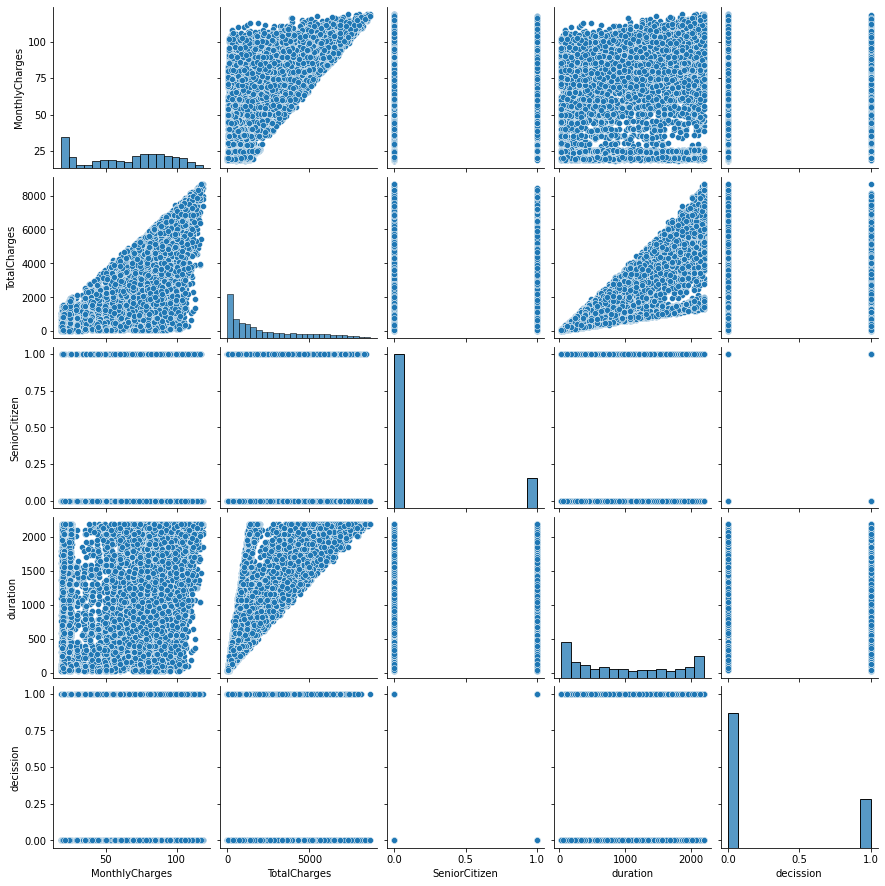

In [28]:
plt.figure(figsize=(9,9))
sns_plot = sns.pairplot(data);
sns.set(font_scale=1.3)

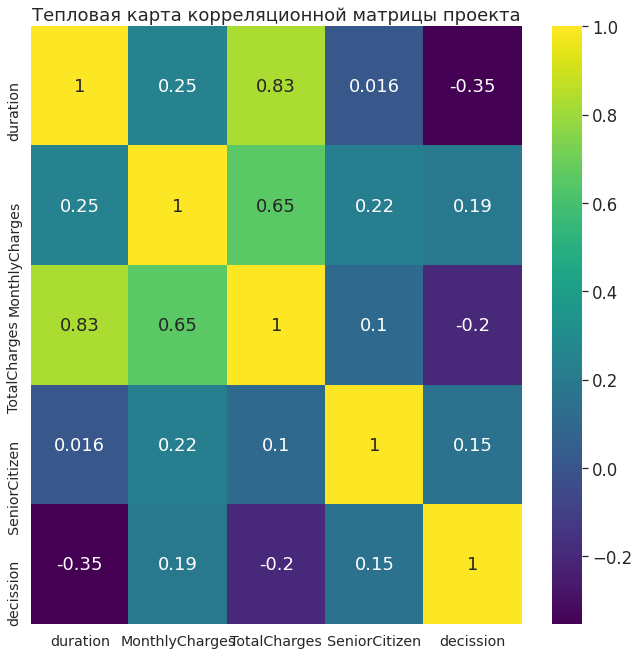

In [29]:
# строим тепловую карту корреляции признаков с целевой переменной 
f, ax = plt.subplots(figsize=(11,11))
sns.set(font_scale=1.5)
cm = np.corrcoef(data[['duration','MonthlyCharges','TotalCharges','SeniorCitizen','decission']].values.T)
sns.heatmap(cm,annot=True, ax=ax, cmap="viridis");
ax.set_xticklabels(['duration','MonthlyCharges','TotalCharges','SeniorCitizen','decission'])    
ax.set_yticklabels(['duration','MonthlyCharges','TotalCharges','SeniorCitizen','decission'])
ax.set_title('Тепловая карта корреляционной матрицы проекта');
plt.show()

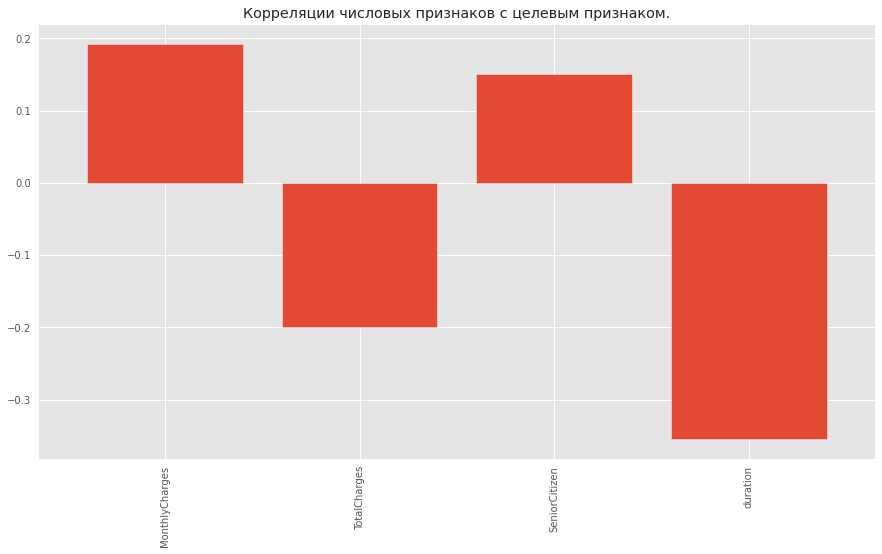

In [30]:
with plt.style.context(('seaborn', 'ggplot')):
    plt.figure(figsize=(15,8))
    data.corr()['decission'].drop('decission').plot(kind='bar', width=0.8,
                                                          title="Корреляции числовых признаков с целевым признаком.")

In [31]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Type              7032 non-null   category
 1   PaperlessBilling  7032 non-null   category
 2   PaymentMethod     7032 non-null   category
 3   MonthlyCharges    7032 non-null   float64 
 4   TotalCharges      7032 non-null   float64 
 5   gender            7032 non-null   category
 6   SeniorCitizen     7032 non-null   int64   
 7   Partner           7032 non-null   category
 8   Dependents        7032 non-null   category
 9   InternetService   7032 non-null   category
 10  OnlineSecurity    7032 non-null   category
 11  OnlineBackup      7032 non-null   category
 12  DeviceProtection  7032 non-null   category
 13  TechSupport       7032 non-null   category
 14  StreamingTV       7032 non-null   category
 15  StreamingMovies   7032 non-null   category
 16  MultipleLines     7032 n

Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
duration            0
decission           0
dtype: int64

In [32]:
data.duplicated().sum()

18

In [33]:
data=data.drop_duplicates().reset_index(drop=True)
data.duplicated().sum()

0

Итак после создания общего датафрейма видим,что
 - пропуски отсутствуют
 - типы данных логичны
 - дубликаты полностью удалены.

Исследуем все статистики и корреляции признаков между собой и с целевым признаком с помощью библиотеки sweetviz.

                                             |          | [  0%]   00:00 -> (? left)


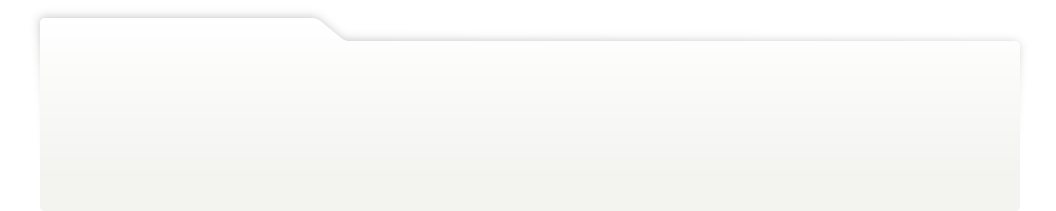
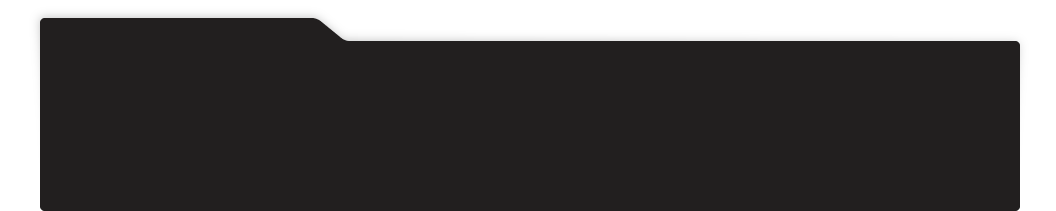
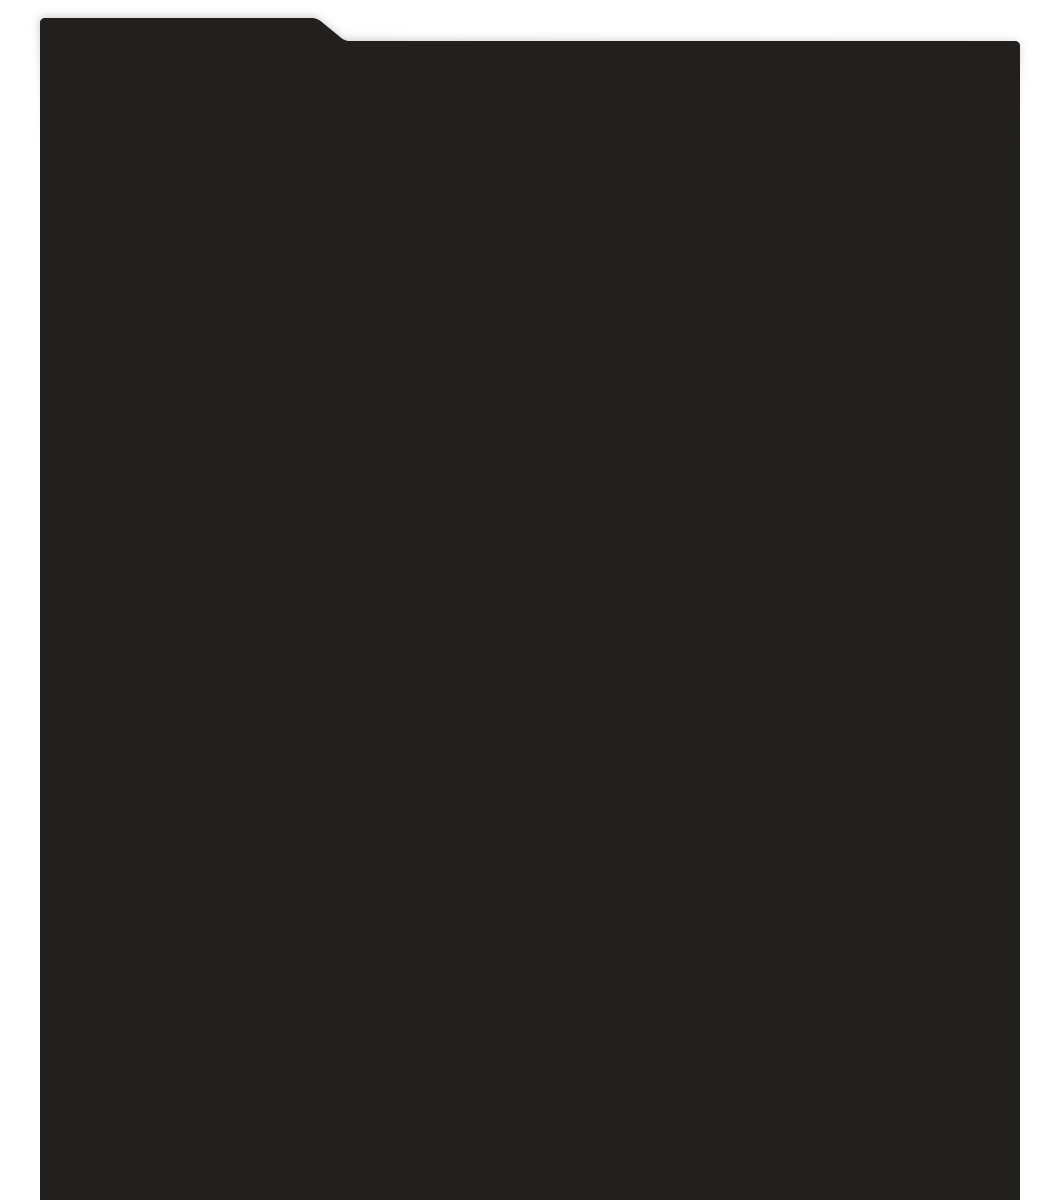
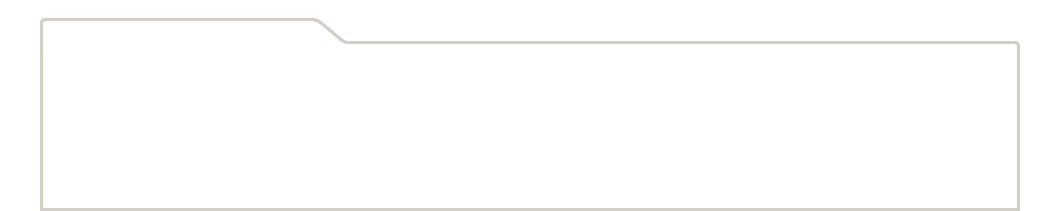
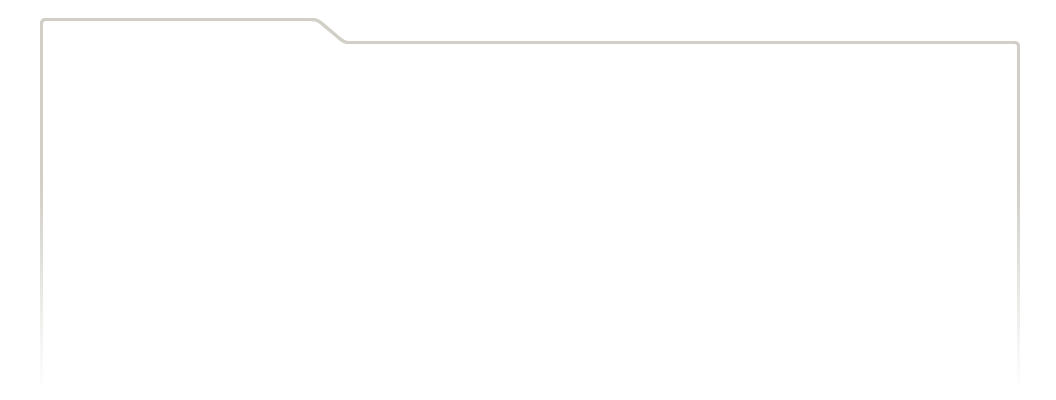
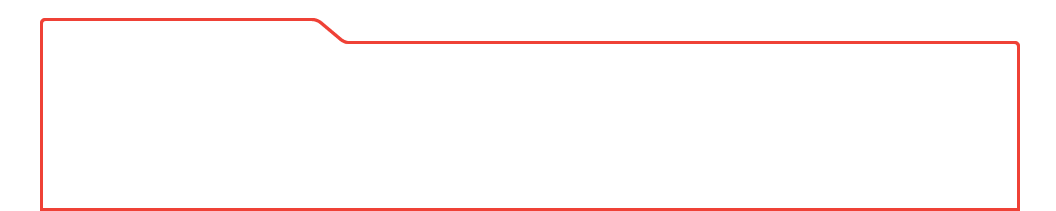
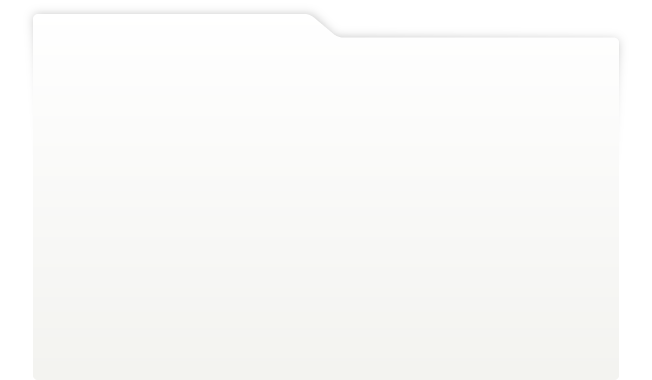
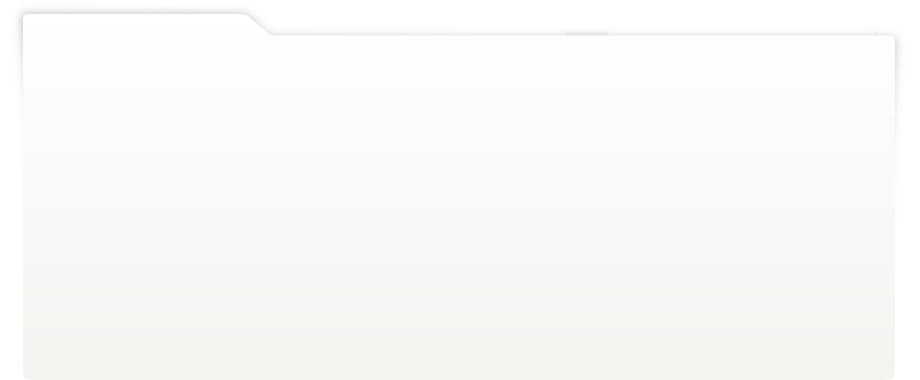
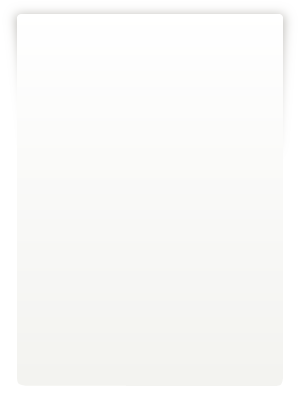
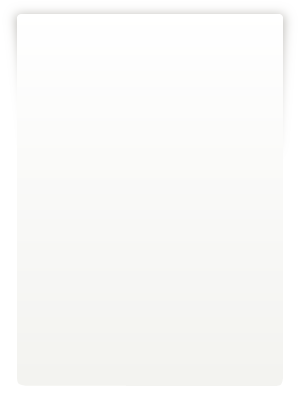
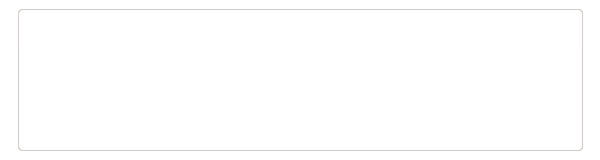
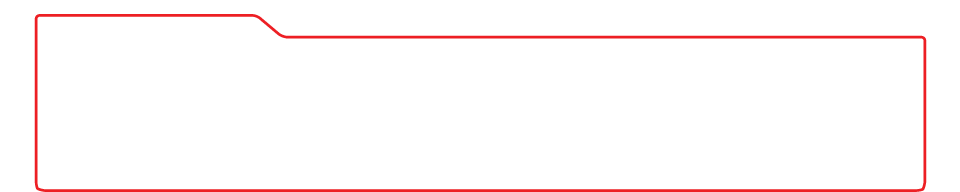
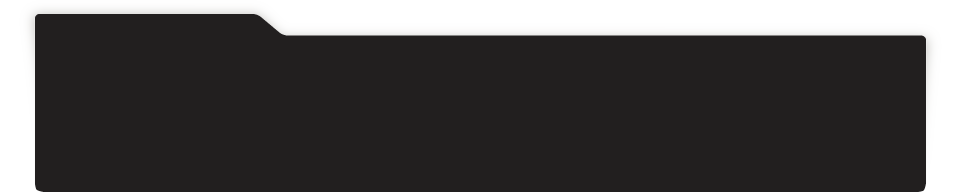
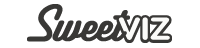
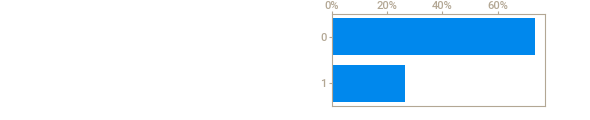
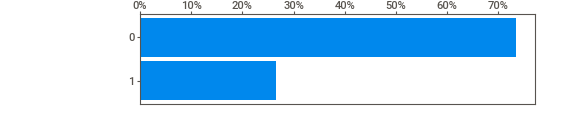
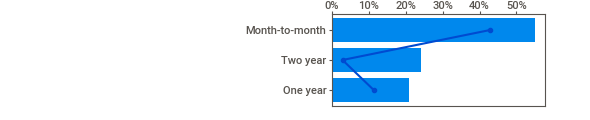
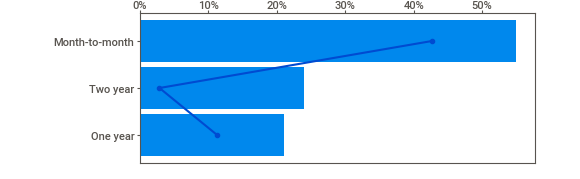
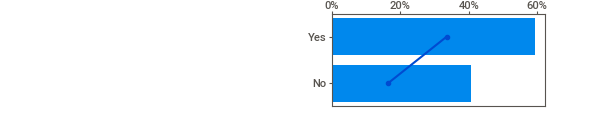
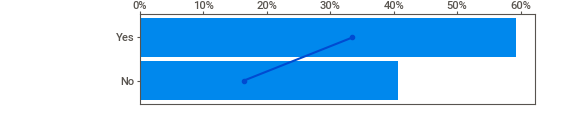
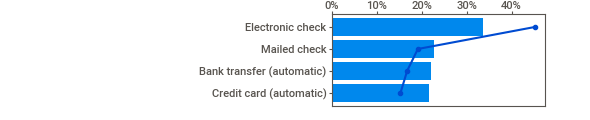
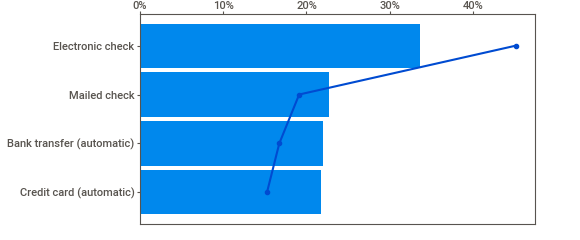
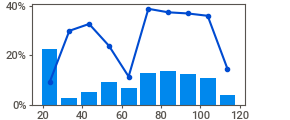
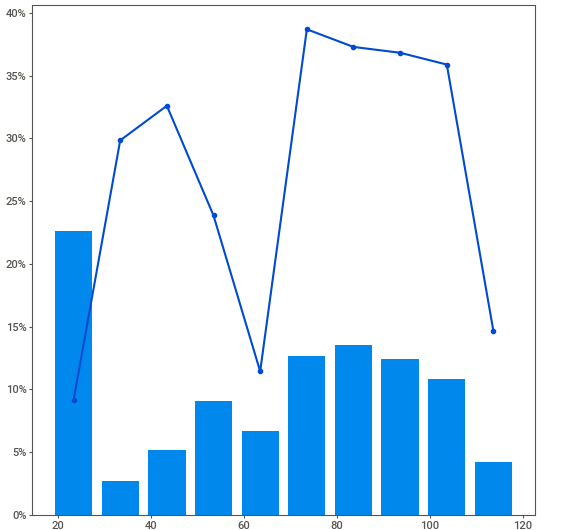
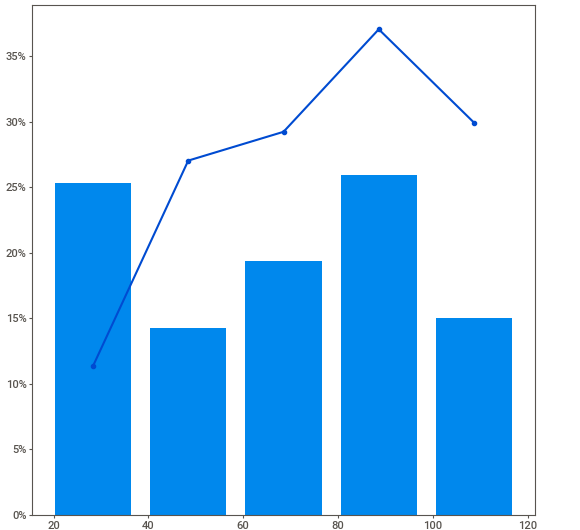
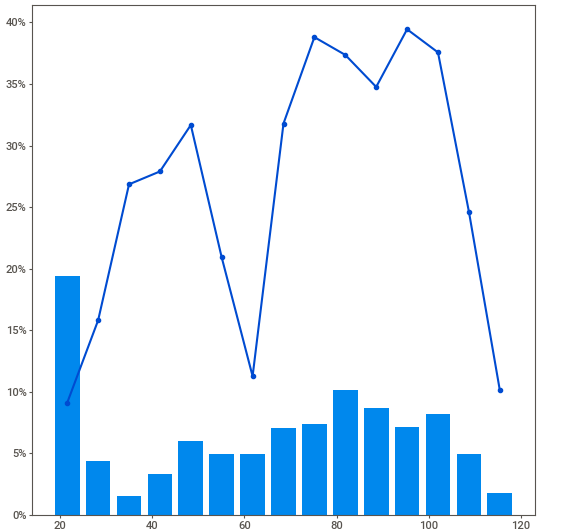
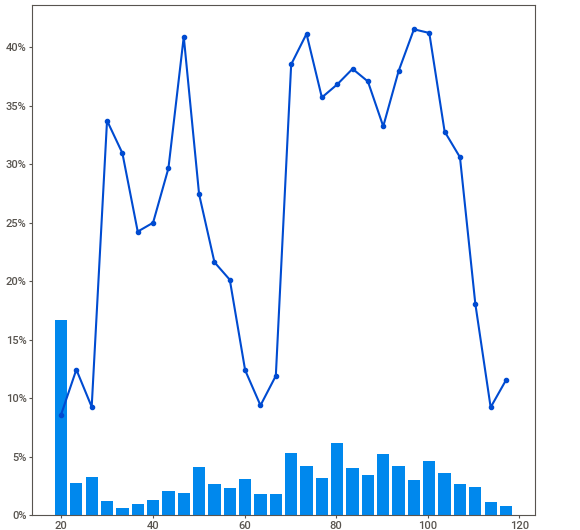
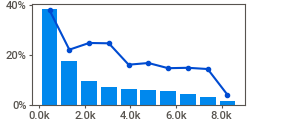
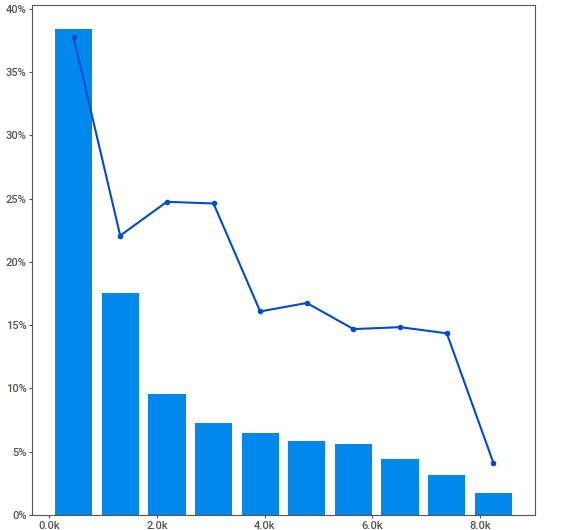
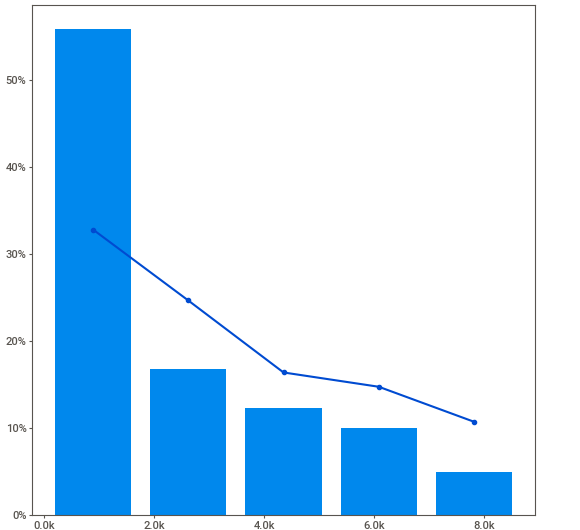
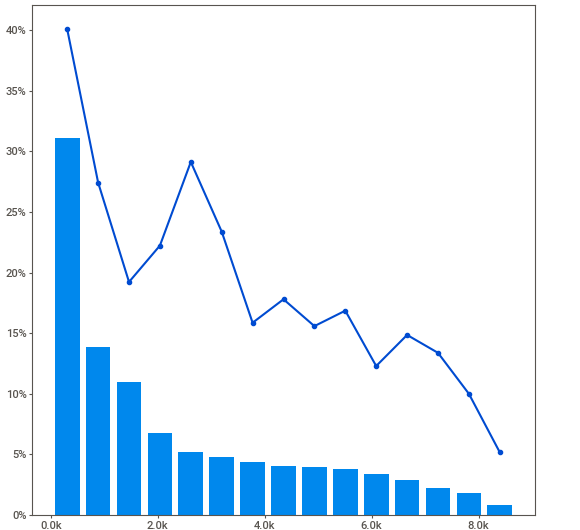
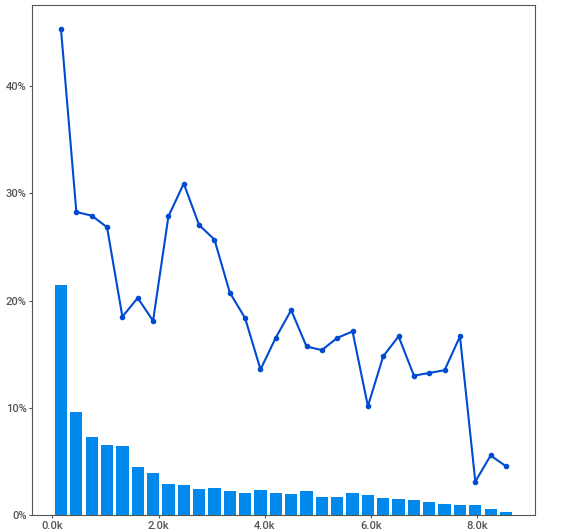
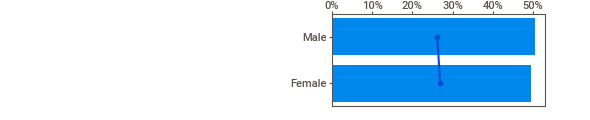
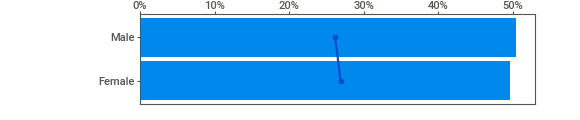
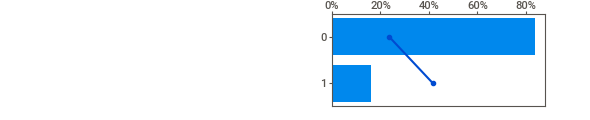
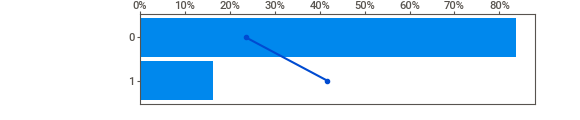
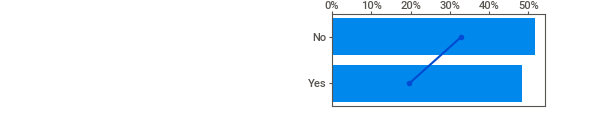
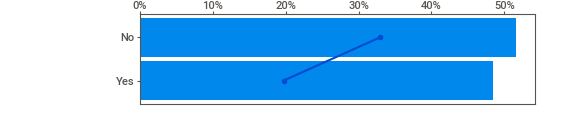
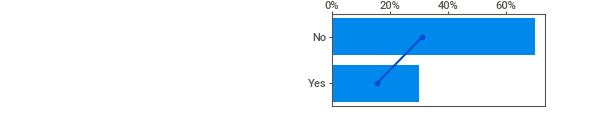
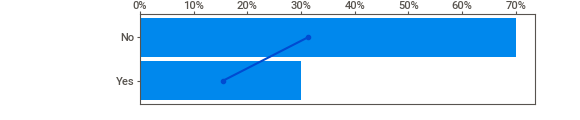
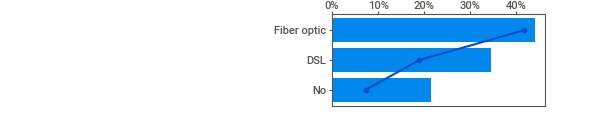
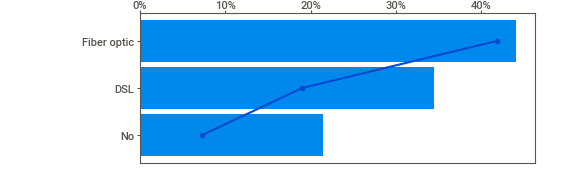
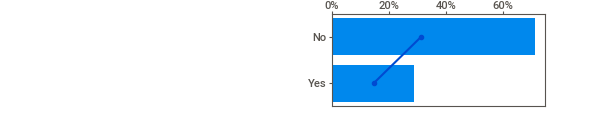
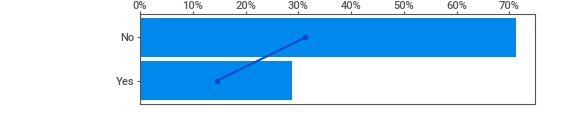
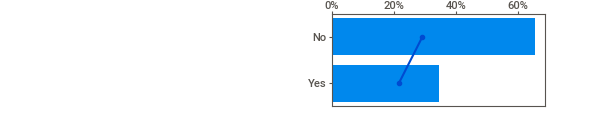
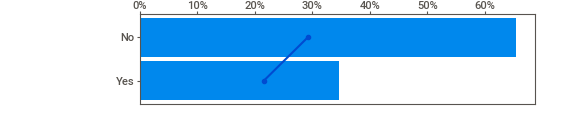
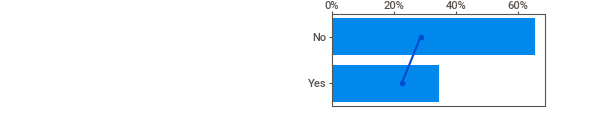
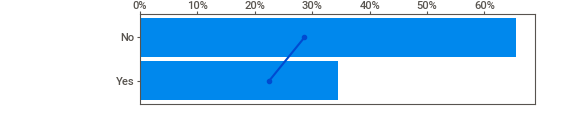
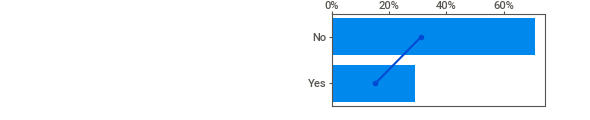
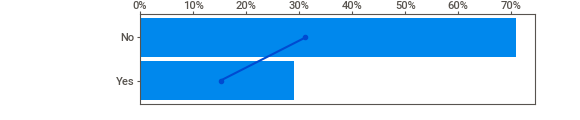
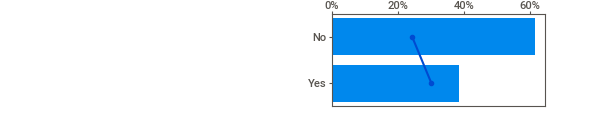
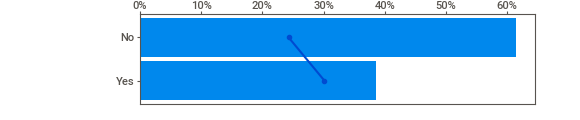
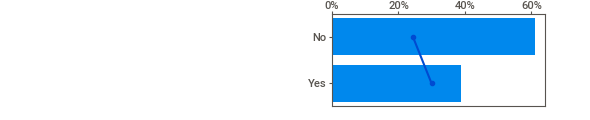
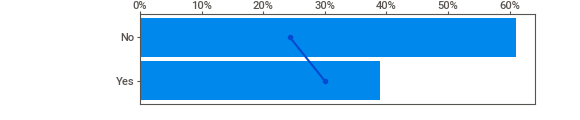
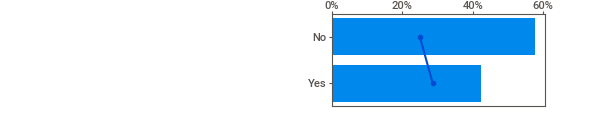
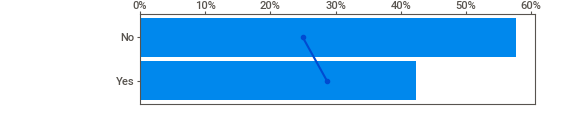
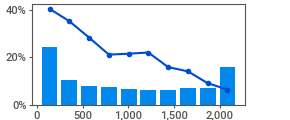
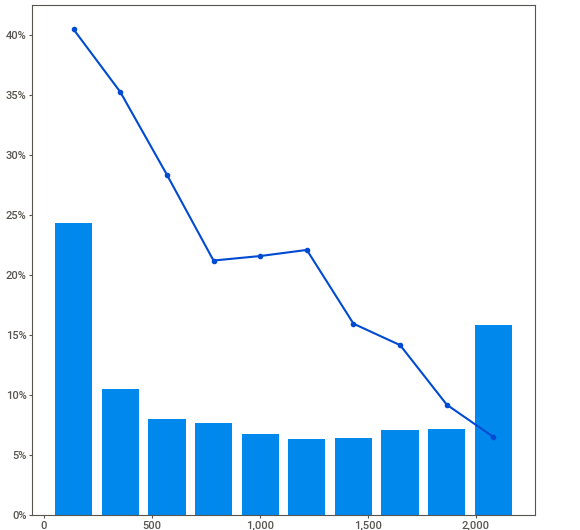
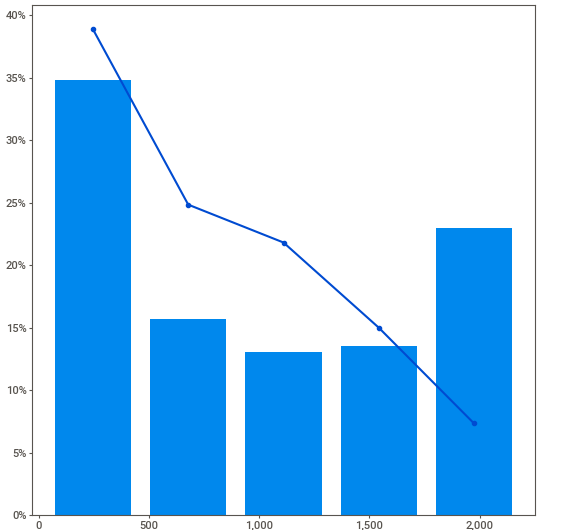
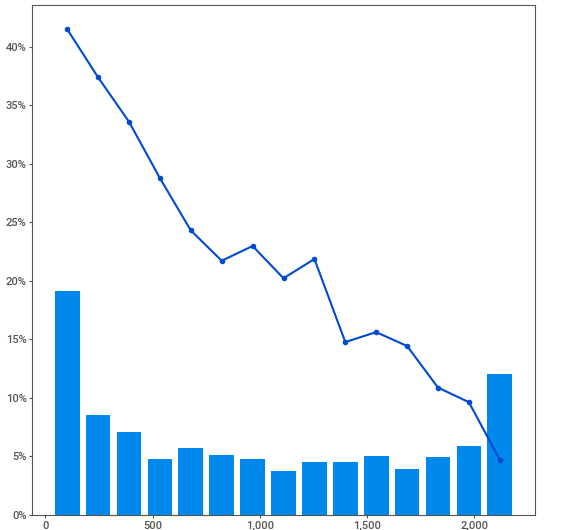
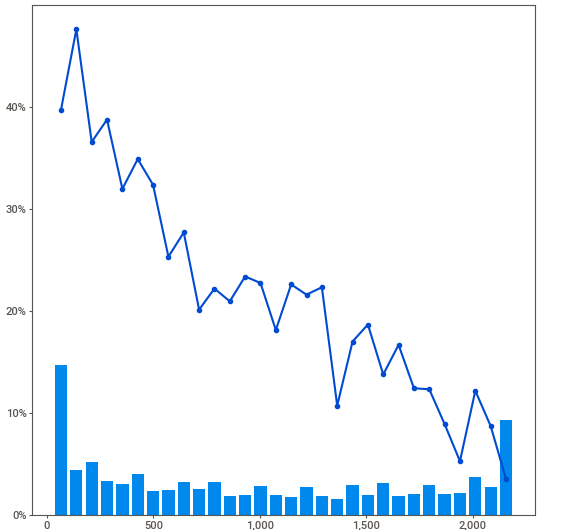
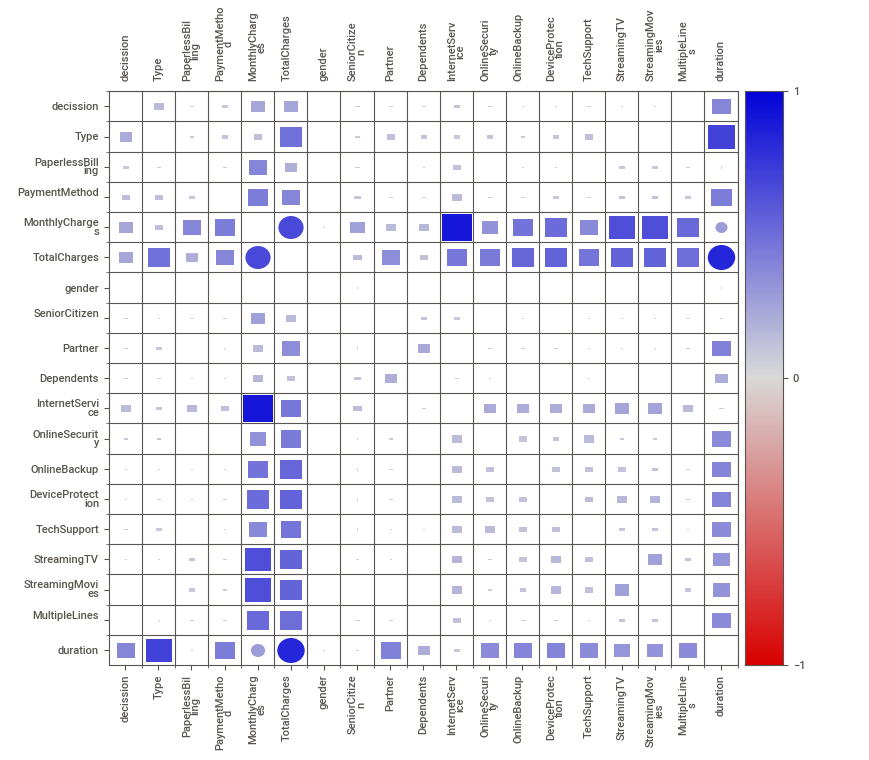
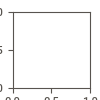

In [34]:
report = sweetviz.analyze([data, "TELECOM"], target_feat="decission")
report.show_notebook()


Рассмотрев корреляции признаков с целевым признаком,видим что есть признаки с нулевой корреляцией с целевым признаком:
DeviceProtection   0.00
StreamingTV        0.00
StreamingMovies    0.00
MultipleLines      0.00
Их удалим при создании features.

Также видим корреляции числовых признаков с целевым признаком

duration       0.35
TotalCharges   0.20
MonthlyCharges 0.19
И здесь действительно новый признак имеет существенную корреляцию с целевым

Распределение меток классов
 0    5153
1    1861
Name: decission, dtype: int64


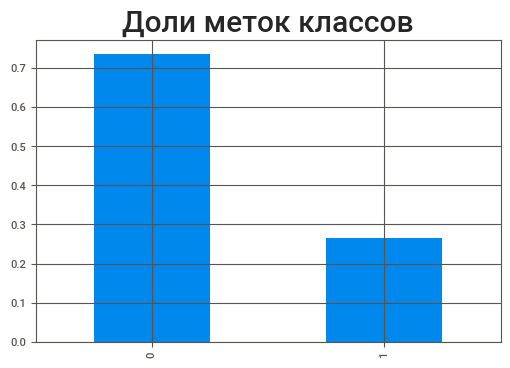

In [35]:
class_frequency = data['decission'].value_counts()
print('Распределение меток классов\n',class_frequency)
data['decission'].value_counts(normalize='true').plot(kind='bar',grid=True,title='Доли меток классов');

In [36]:
features = data.drop(columns=['decission'],axis=1)
target= data['decission']
print(features.shape)
print(target.shape)

(7014, 18)
(7014,)


In [37]:
features_train,features_test,target_train,target_test =train_test_split(features,target,test_size=0.25,
                                                                        random_state=120922,stratify=target)
print(features_train.shape,target_train.shape)
print(features_test.shape,target_test.shape)

(5260, 18) (5260,)
(1754, 18) (1754,)


In [38]:
%%time
# Преобразование для числовых признаков
numeric_features= ['TotalCharges','SeniorCitizen','MonthlyCharges','duration']
numeric_transformer =  StandardScaler()

# Преобразование для категориальных признаков
categorical_features = ['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', \
                        'Partner', 'Dependents', 'InternetService', 'OnlineSecurity',\
                        'OnlineBackup','TechSupport']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Преобразуем признаки в зависимости от их типа
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)])
    

pipe_log = make_pipeline(
               preprocessor,  LogisticRegression(random_state=120922,class_weight='balanced'))                       


param_grid = {'logisticregression__C': [50.0,100.0,300.0],
              'logisticregression__penalty':['l1','l2','elasticnet'],
              'logisticregression__fit_intercept': [True, False],
              'logisticregression__solver': ["liblinear", "saga"]}
             
grid = GridSearchCV(pipe_log, param_grid, scoring = 'roc_auc', cv=5)
grid = grid.fit(features_train, target_train)
grid.best_params_


CPU times: user 23.7 s, sys: 10.6 s, total: 34.3 s
Wall time: 34.5 s


{'logisticregression__C': 300.0,
 'logisticregression__fit_intercept': True,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [39]:
print('Значение ROC_AUC логистической модели на train выборке :' , (grid.best_score_).round(2))

Значение ROC_AUC логистической модели на train выборке : 0.84


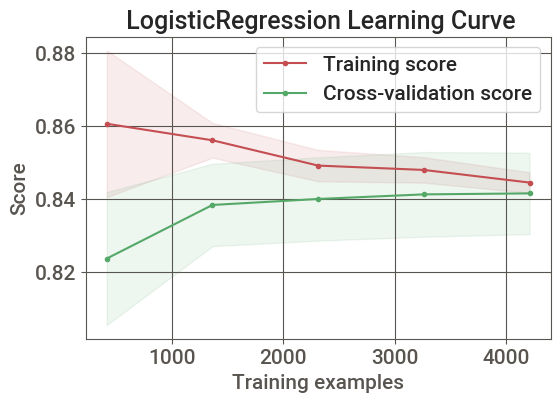

In [41]:
skplt.estimators.plot_learning_curve(grid,features_train,target_train ,
                                     cv=5, shuffle=True, scoring="roc_auc",
                                     n_jobs=1, figsize=(6,4), title_fontsize="medium", text_fontsize="small",
                                     title=" LogisticRegression Learning Curve");

Видим,что данных для анализа достаточно и больше вряд ли что можно получить от модели LogisticRegression

Рассмотрим модель СatboostСlassifier.

In [45]:
# посчитаем  веса классов 
classes = np.unique(target_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=target_train)
class_weights = dict(zip(classes, weights))
print(class_weights)

{0: 0.6806418219461697, 1: 1.8839541547277936}


In [46]:
# столбцы с категориями
mylist = list(features.select_dtypes(include=['category']).columns)
print(mylist)

['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']


In [47]:
#  список индексов столбцов с категориальными значениями
cat_index = [features.columns.get_loc(ind) for ind in mylist if ind in data]
print(cat_index)

[0, 1, 2, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


Подберем гиперпараметры и найдем лучшую модель

In [49]:
 
cat_features_index = cat_index
params = {'depth': [3,5],
          'learning_rate': [0.3,0.5],
         # 'l2_leaf_reg': [1],
          'iterations': [300,700]}
cb = cb.CatBoostClassifier()
cb_model = GridSearchCV(cb, params, scoring="roc_auc",verbose=False, cv=5)
cb_model.fit(features_train, target_train,
            cat_features=cat_features_index)



0:	learn: 0.5685633	total: 52.9ms	remaining: 15.8s
1:	learn: 0.5060787	total: 58.6ms	remaining: 8.72s
2:	learn: 0.4576043	total: 63.8ms	remaining: 6.32s
3:	learn: 0.4322578	total: 68.7ms	remaining: 5.08s
4:	learn: 0.4210374	total: 73.5ms	remaining: 4.34s
5:	learn: 0.4119611	total: 77.8ms	remaining: 3.81s
6:	learn: 0.4088305	total: 82.1ms	remaining: 3.44s
7:	learn: 0.3996957	total: 86.6ms	remaining: 3.16s
8:	learn: 0.3966221	total: 91.2ms	remaining: 2.95s
9:	learn: 0.3938196	total: 96.2ms	remaining: 2.79s
10:	learn: 0.3904714	total: 102ms	remaining: 2.67s
11:	learn: 0.3888041	total: 107ms	remaining: 2.56s
12:	learn: 0.3881375	total: 111ms	remaining: 2.45s
13:	learn: 0.3870742	total: 116ms	remaining: 2.37s
14:	learn: 0.3859368	total: 120ms	remaining: 2.27s
15:	learn: 0.3847214	total: 123ms	remaining: 2.19s
16:	learn: 0.3839994	total: 126ms	remaining: 2.1s
17:	learn: 0.3827292	total: 131ms	remaining: 2.05s
18:	learn: 0.3774233	total: 136ms	remaining: 2.02s
19:	learn: 0.3757234	total: 142m

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f29772a4160>,
             param_grid={'depth': [3, 5], 'iterations': [300, 700],
                         'learning_rate': [0.3, 0.5]},
             scoring='roc_auc', verbose=False)

In [50]:
print('ROC AUC лучшей модели на train выборке :', (cb_model.best_score_).round(2))

ROC AUC лучшей модели на train выборке : 0.92


In [51]:
print('Лучшие параметры модели:', cb_model.best_params_) 
 

Лучшие параметры модели: {'depth': 3, 'iterations': 700, 'learning_rate': 0.3}


Определим лучшую модель и проведем исследование.

In [52]:
%%time
model = CatBoostClassifier(**cb_model.best_params_,eval_metric='AUC')
cat_features_index = cat_index

model.fit(features_train, target_train,
           eval_set=(features_test, target_test),
           verbose=False,
            cat_features=cat_features_index,plot=True);
model.set_feature_names(features.columns.tolist()) 


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CPU times: user 3.33 s, sys: 137 ms, total: 3.47 s
Wall time: 4.45 s


In [53]:
print('ROC AUC как вероятность принадлежности к положит. классу на test выборке : {:.2f}'.format(roc_auc_score(target_test,
                                        model.predict_proba(features_test)[:, 1])))

ROC AUC как вероятность принадлежности к положит. классу на test выборке : 0.93


Cравним исследуемые модели.

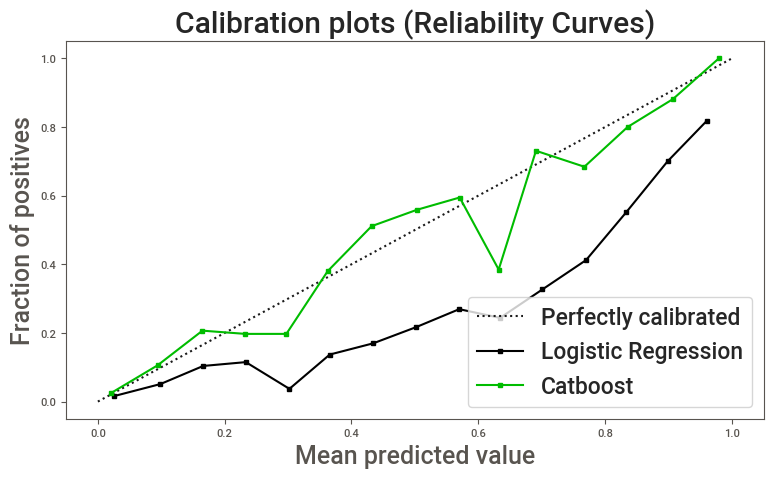

In [55]:
lgr_probas = grid.predict_proba(features_test)[:,1]
cat_probass = model.predict_proba(features_test)[:,1]
probas_list = [lgr_probas,cat_probass]
clf_names = ['Logistic Regression','Catboost']
skplt.metrics.plot_calibration_curve(target_test,
                                     probas_list,
                                     clf_names, n_bins=15,
                                     figsize=(9,5)
                                     );

Видим по графику объяснений возможностей моделей,что определение долей положительного класса лучше происходит у бустинговой модели.
Ну а LogisticRegression далека от совершенства.


Рассмотрим результаты лучшей выбранной модели.

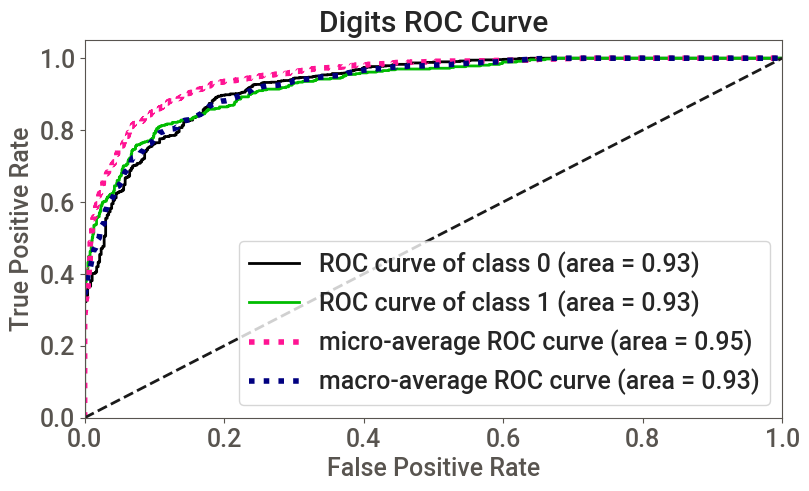

In [56]:
cat_probs = model.predict_proba(features_test)

skplt.metrics.plot_roc_curve(target_test, cat_probs,
                       title="Digits ROC Curve", figsize=(9,5));

На графике видим можно сказать отличную способность лучшей модели определять доли  TPR и FPR  как для положительных так и
отрицательных классов.

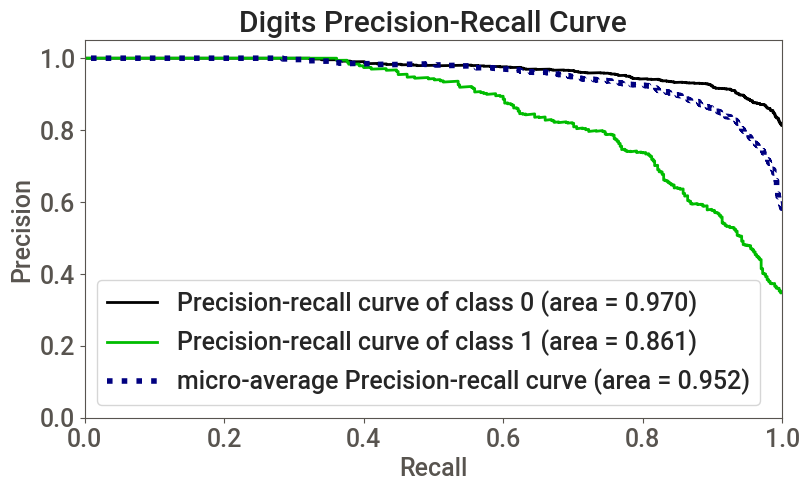

In [57]:
skplt.metrics.plot_precision_recall_curve(target_test, cat_probs,
                       title="Digits Precision-Recall Curve", figsize=(9,5));

По кривой precission-recall видим, что соотношение точности и полноты несколько лучше для отрицательного класса.

In [58]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,duration,64.811776
1,MonthlyCharges,9.430807
2,TotalCharges,7.871571
3,Type,5.527595
4,InternetService,3.848945
5,PaymentMethod,2.272429
6,PaperlessBilling,0.949370
7,SeniorCitizen,0.821501
8,gender,0.804262
9,OnlineSecurity,0.711338


Матрица ошибок модели : [[3794.   70.]
 [ 249. 1147.]]


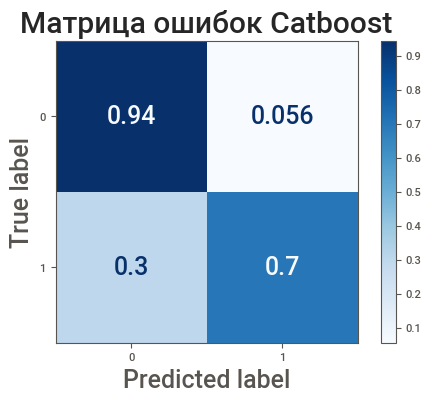

In [59]:
cm = get_confusion_matrix(model, Pool(features_train, target_train,cat_features=cat_features_index))
print('Матрица ошибок модели :',cm)
plot_confusion_matrix(estimator=model, X=features_test, y_true=target_test,\
                    normalize='true',cmap='Blues');
plt.title('Матрица ошибок Catboost');

Видим , что доля TP=0,7 а по сути recall не очень значимая,ну а доля отрицательны классов,определенных как положительные
FP=0.056 вызывает восторг.
Доля истинно-отрицательных классов TN=0.94 показывает,что модель на наших данных замечательно определяет тех клиентов,
которые решили остаться и не требуют дополнительных привелегий.
Но доля тех,кто соберется уйти, а модель предсказала что они останутся равна FN=0.3. 

ОБЩИЙ ВЫВОД ПРОЕКТА:

- После анализа представленных заказчиком данных, их предобработки и подготовки были созданы и исследованы модели
  LogisticRegression и CatboostClassifier 
  Максимальная метрике ROC AUC в значении 0.91 была получена на модели CatboostClassifier.
  Проведен визуальный анализ возможностей по определению меток классов этих моделей.
  Определены важные признаки модели, представлен их анализ.
  Построена и проанализирована с выводами матрица неточностей.

                              ОТЧЕТ ПО ПРОЕКТУ 
                          "Прогноз оттока клиентов оператора связи"  
                          
1. ИССЛЕДОВАНИЕ ПРЕДСТАВЛЕННЫХ ДАННЫХ.

-   1.1. Данные представленны в виде четырех таблиц:
     contract.csv — информация о договоре;
-    personal.csv — персональные данные клиента;
-    internet.csv — информация об интернет-услугах;
-    phone.csv — информация об услугах телефонии.

     1.2.Проведенный исследовательский анализ показал в датафрейме contract отсутствие пропусков и аномалий.
     Было обнаружено 11 абонентов с датой заключения контракта на момент завершения сбора данных - удалены.
     Тип данных соответствовал логике содержащихся в таблице данных.
     
     1.3. В оставшихся трех датафреймах personal,internet,phone пропуски и аномалии также не обнаружены.
     
2. ПРЕДОБРАБОТКА ПРЕДСТАВЛЕННЫХ ДАННЫХ.

-   2.1. Произведено объединение таблиц для дальнейшей работы по исследованию моделей в результате чего появились 
    пропуски в данных которые были заполнены значением "NO",которое и свидетельствует об отсутствии пользования услугами.
    
    2.2. Создан дополнительный признак 'duration',определяемый как длительность контракта от момента его заключения до 
    завершения действия контракта.
    
    2.3. Столбцы с началом действия контракта BeginDate и окончанием контракта EndDatе были удалены после того как 
    столбец  с информацией о закрытии контракта EndDate был определён как целевой признак (новый целевой признак'decission') а
    именно ,что продолжение контракта ( значение "NO" ) есть метка отрицательного класса ("0"), а закрытие контракта (любая
    другая информация) есть метка положительного класса ("1").
    
    2.4. Построены матрицы корреляций числовых признаков, а также с помощью библиотеки sweetviz определены корреляции
    категориальных признаков как между собой,так и с целевым признаком, а именно:
    
    2.4.1. категориальные признаки с нулевой корреляцией с целевым признаком:
    
       DeviceProtection   0.00
       StreamingTV        0.00
       StreamingMovies    0.00
       MultipleLines      0.00


      корреляции числовых признаков с целевым признаком

      duration       0.35
      TotalCharges   0.20
      MonthlyCharges 0.19
      
      Принято решение их оставить и правильность его подтверждена результатами испытаний моделей.
  
     
3. СОЗДАНИЕ И ИСПЫТАНИЕ РАЗНЫХ МОДЕЛЕЙ.
  
   3.1. Были испытаны модели LogisticRegression, CatBoostClassifier.
   
   3.1.2. Для модели LogisticRegression подобраны следующие гиперпараметры
   {'logisticregression__C': 300.0,
   'logisticregression__fit_intercept': True,
   'logisticregression__penalty': 'l2',
   'logisticregression__solver': 'liblinear'}
   и полученно значение  ROC_AUC логистической модели на train выборке : 0.84.
   После построения кривой обучения принято решение о невозможности модели получить требуемую ТЗ метрику.
   
   3.2. Испытана модель CatBoostClassifier,получены лучшие параметры модели: {'depth': 3, 'iterations': 700, 'learning_rate': 
   0.3} и метрика ROC AUC лучшей модели на train выборке : 0.92.
   
   3.2.1. Для лучшей модели получена 
        ROC AUC как вероятность принадлежности к положит. классу на test выборке : 0.93.
        
4. Визуализация и анализ полученных результатов.

   4.1. Построены кривые ROC AUC и PRECISION-RECALL с результатами разделения по целевым классам.
   4.2. Определены важные признаки.
   4.3. Построена и проанализирована матрица неточностей.
   
5. Сделаны выводы по этапам исследования и общий вывод по проекту.   
   
   
